In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [86]:
df.shape

(11251, 15)

In [87]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [89]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [91]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [92]:
df.dropna(inplace=True)

In [93]:
df.shape

(11239, 13)

In [94]:
df['Amount']=df['Amount'].astype(int)

In [95]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


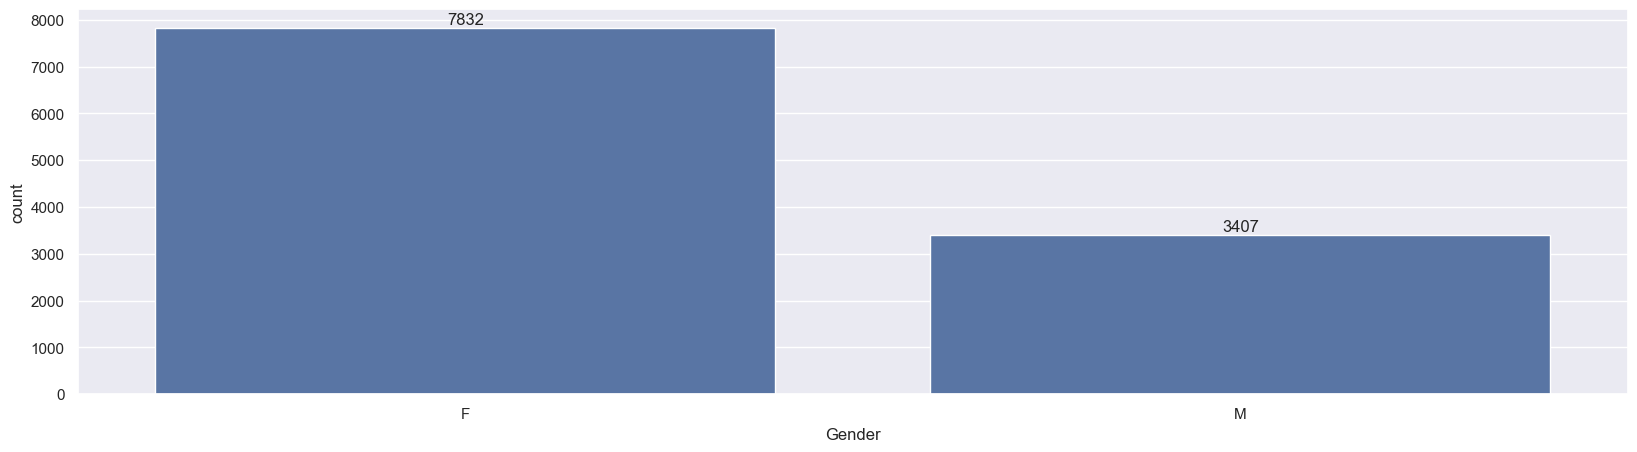

In [96]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

From above graph we can conclude that Females have shopped more than Male

<Axes: xlabel='Gender', ylabel='Amount'>

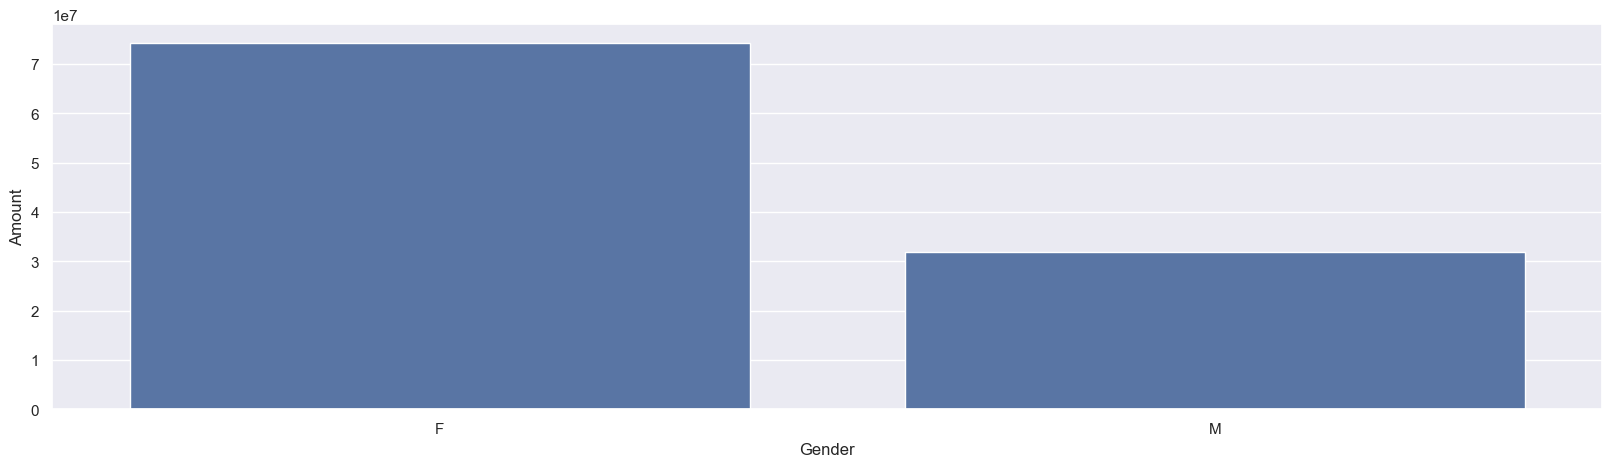

In [97]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)

From the above graph we can conclude that majority of the buyers are female and the purchasing power of females are greater than Men

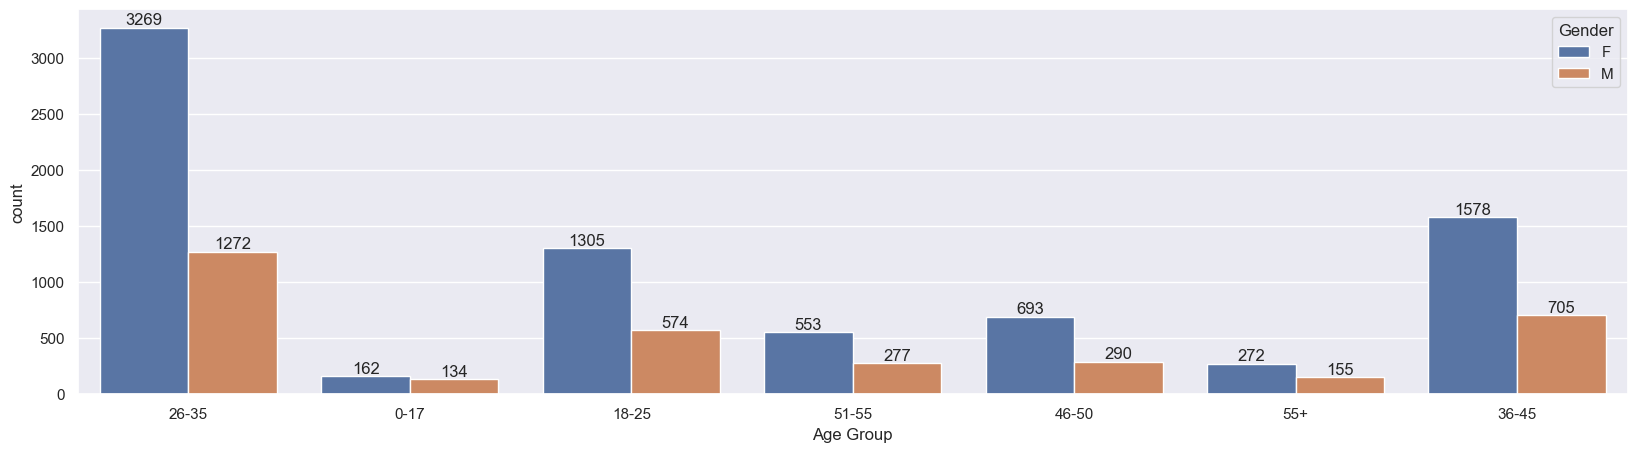

In [98]:
ax=sns.countplot(x='Age Group',hue='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

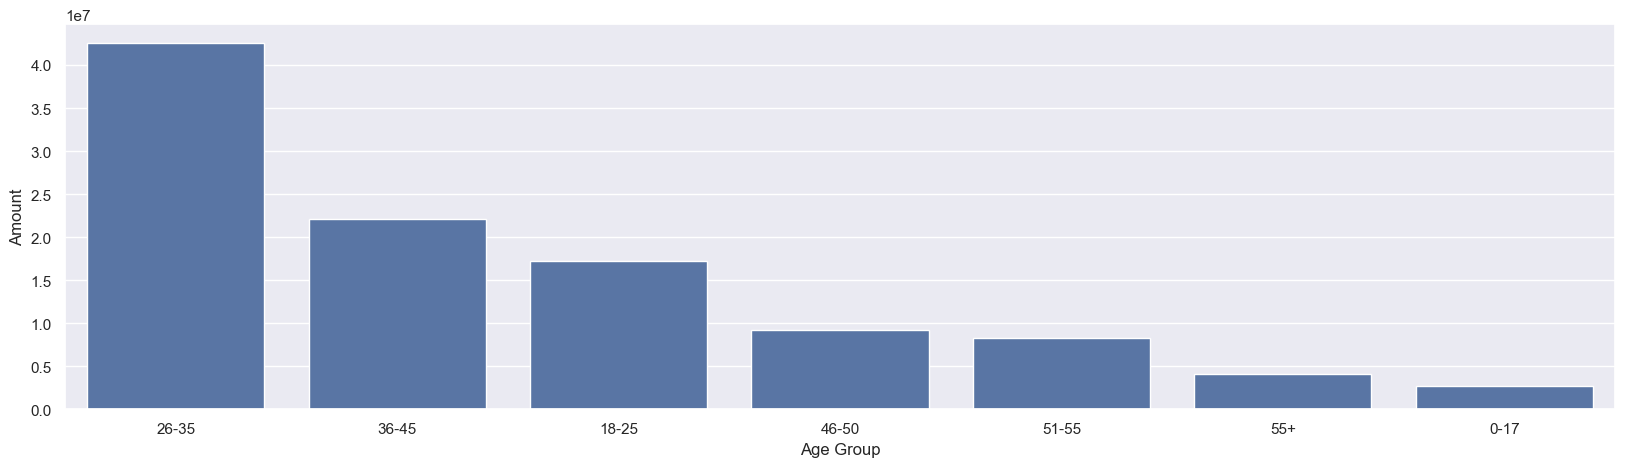

In [99]:
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_age)

From above graph it can be seen that the Females between age group of 26-35 have purchased the most during Diwali

<Axes: xlabel='State', ylabel='Orders'>

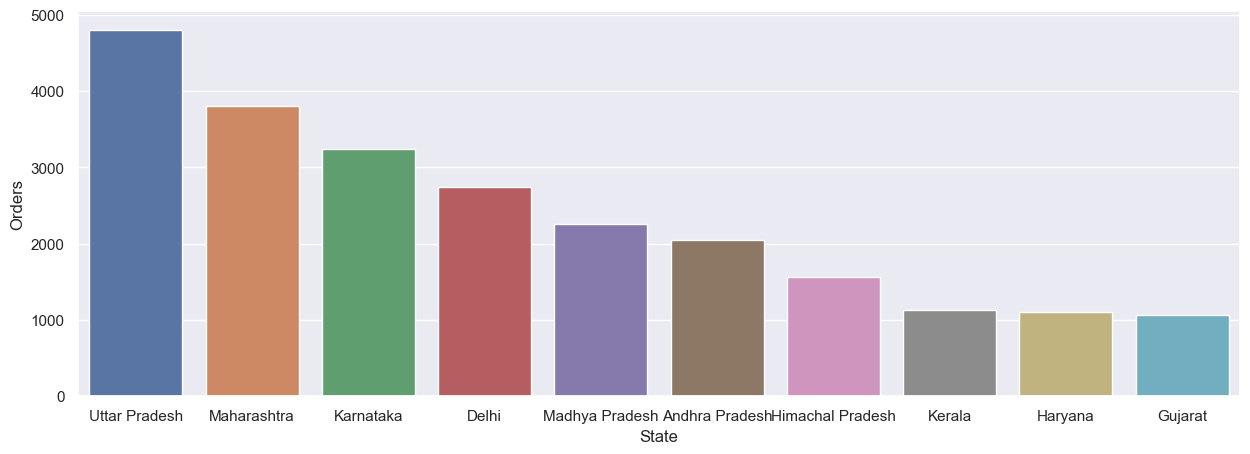

In [100]:
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})

sns.barplot(x='State',y='Orders',hue='State',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

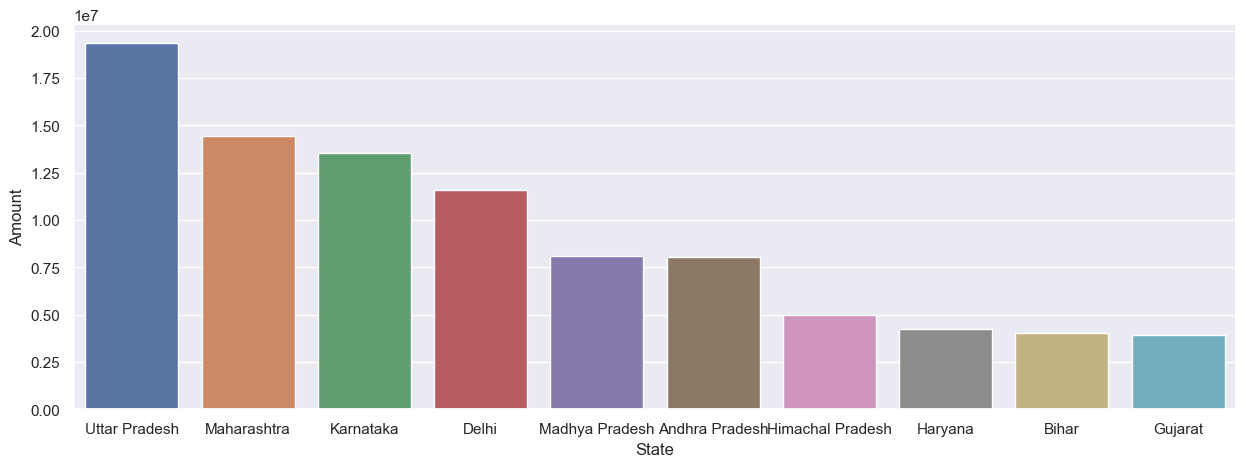

In [101]:
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})

sns.barplot(x='State',y='Amount',hue='State',data=sales_state)

From the graphs above we can see the Total orders by state and Total amount spent by state. UP, Maharashtra and Karnataka are top 3 by orders as well as amount spent.

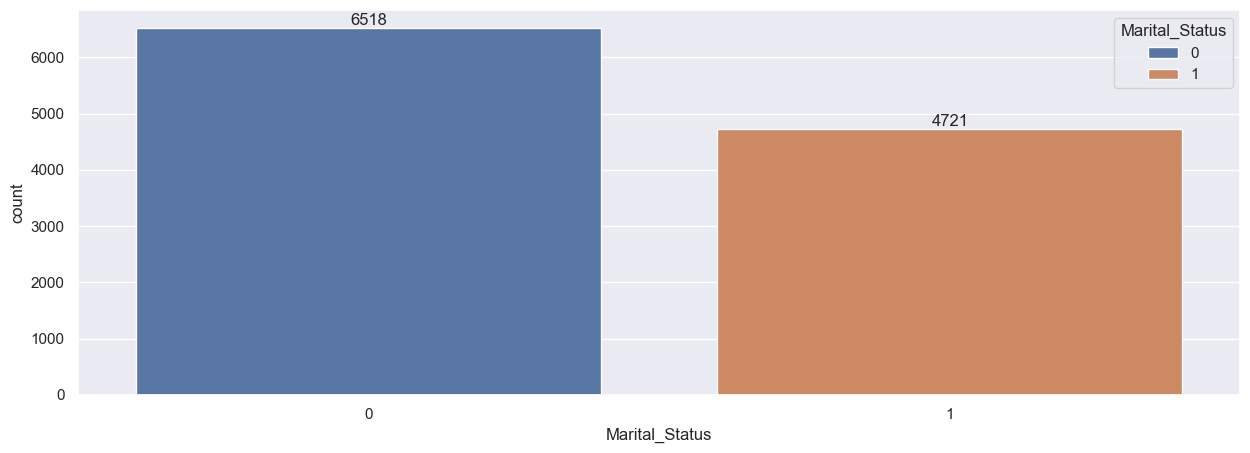

In [102]:
ax=sns.countplot(x='Marital_Status',hue='Marital_Status', data=df)

sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

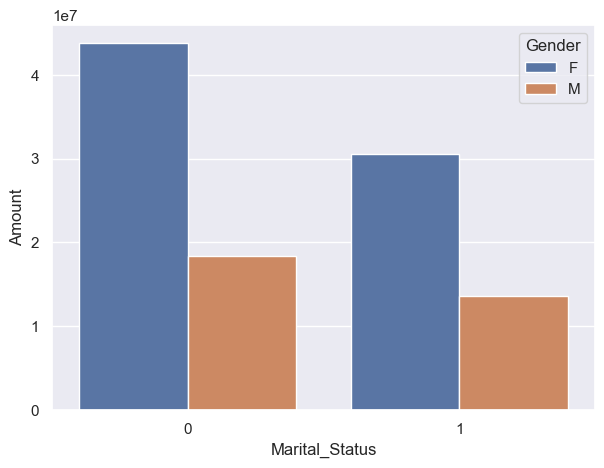

In [103]:
sales_marriage=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(7,5)})

sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_marriage)

The graphs indicate that he most shoppers are Married Women

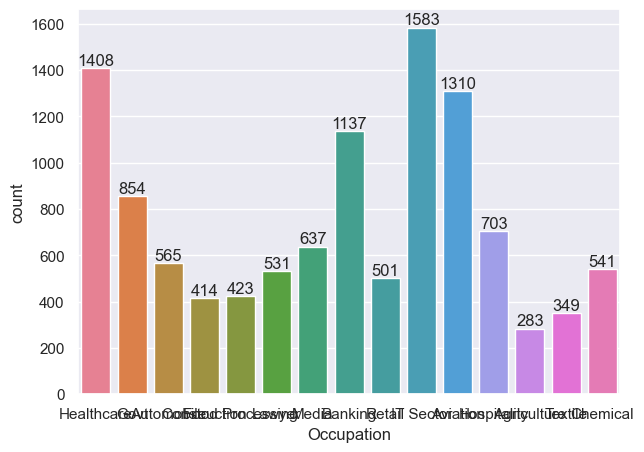

In [104]:
ax=sns.countplot(x='Occupation',hue='Occupation', data=df)

sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

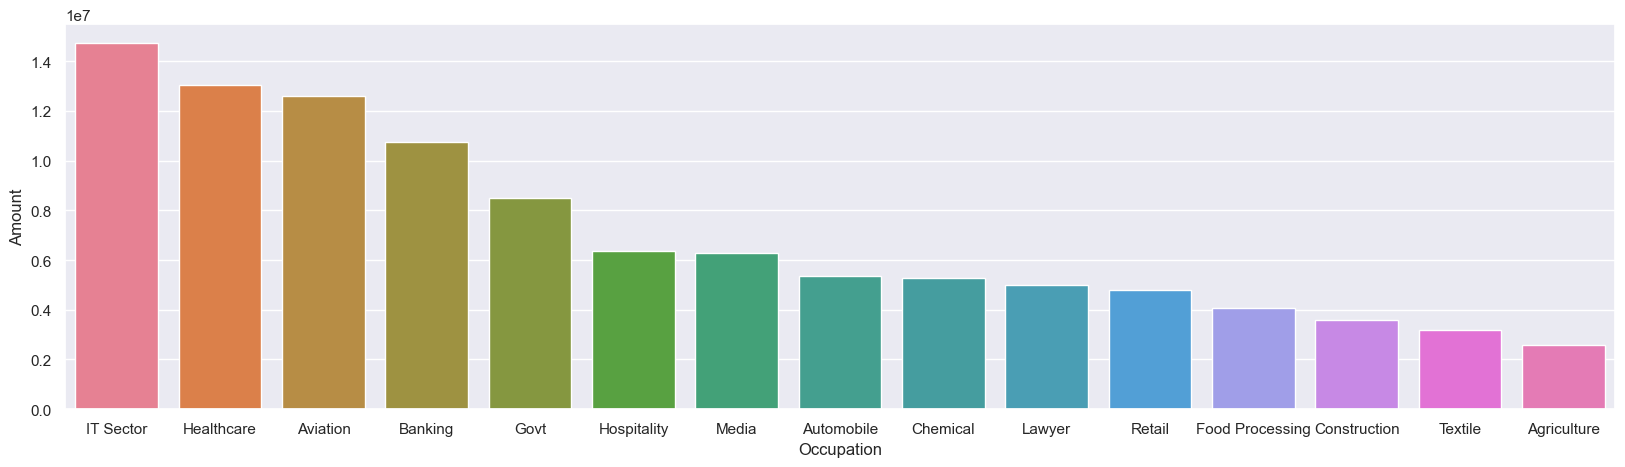

In [105]:
sales_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='Occupation',y='Amount',hue='Occupation',data=sales_occupation)

From the graphs we can see the most number of buyers are from IT, Healthcare and Aviation sector

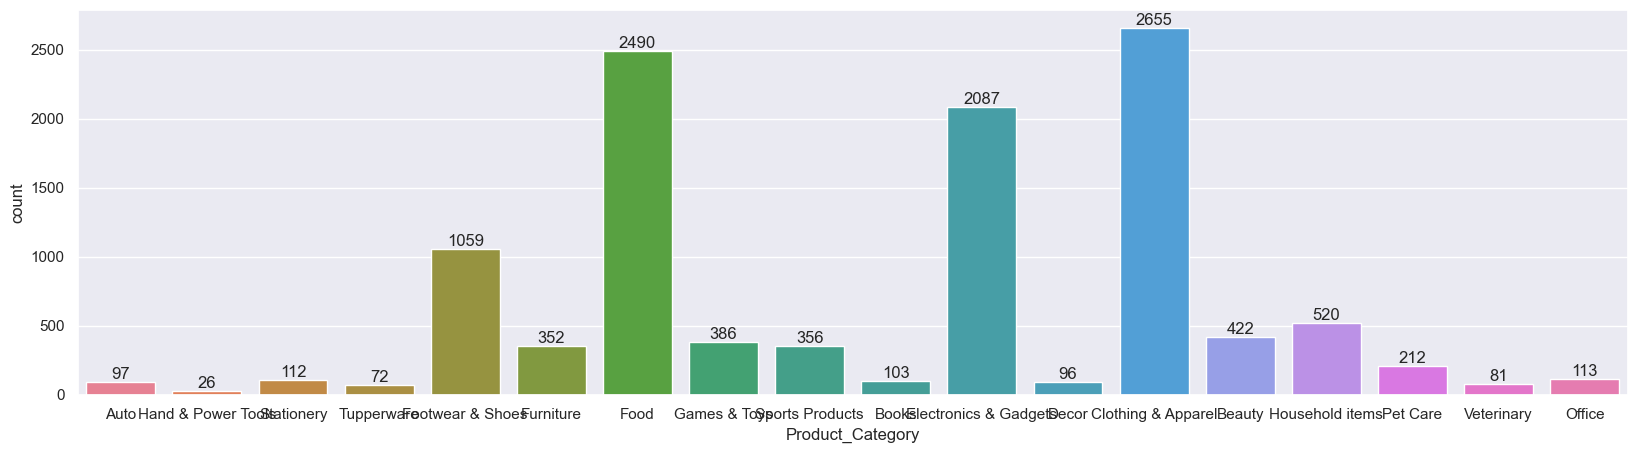

In [106]:
ax=sns.countplot(x='Product_Category',hue='Product_Category', data=df)

sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

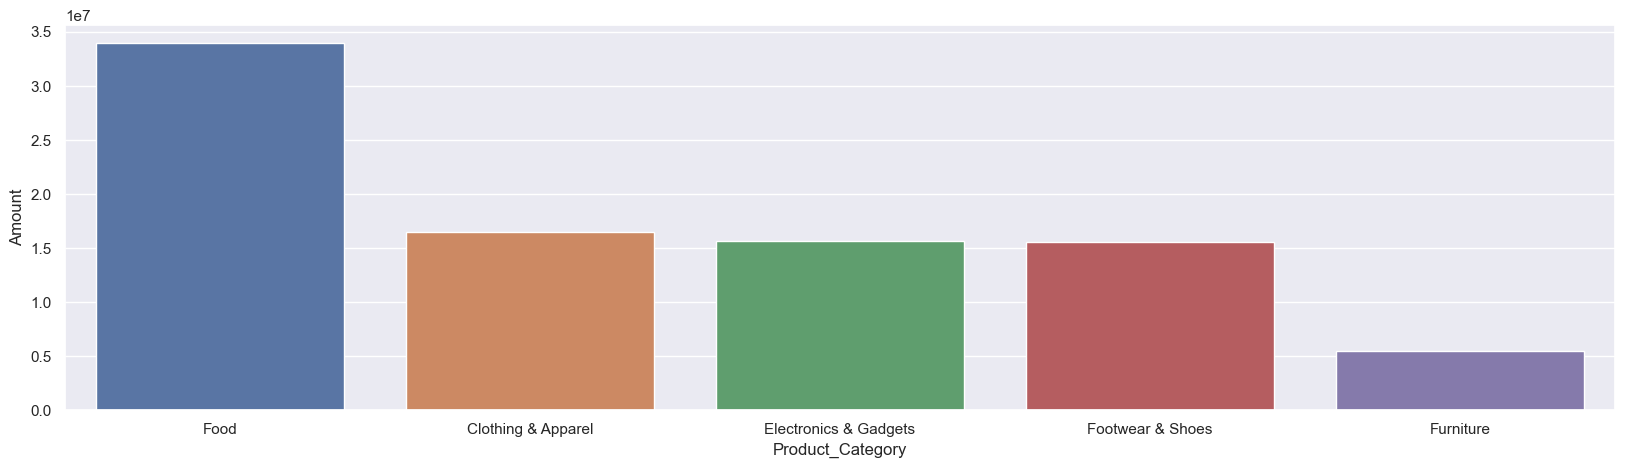

In [107]:
sales_product=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='Product_Category',y='Amount',hue='Product_Category',data=sales_product)

From the graphs we can conclude that Food, Clothing & Electronics category were sold the highest.

## **Conclusion** ##

On the basis of above project we can conclude that- Married Women age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy food Clothing and Electronics Category.